### This notebook preprocess the data separately in two different ways
- Removing outliers according to predefined limits from Initial EDA notebook
- Apply nonlinear transformation using QuantileTransformer: uniform distribution

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
# import data
data = pd.HDFStore("train.h5", "r").get("train")

In [3]:
# split data into test and train
train, test = train_test_split(data, test_size=0.25, random_state=0, shuffle= False)
Y_train = train.y
X_train = train.drop(['y'], axis=1)
Y_test = test.y
X_test = test.drop(['y'], axis=1)

In [14]:
# replace missing data (NaN) with median values
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
clm_names=X_train.columns
X_train=pd.DataFrame(imp.fit_transform(X_train), columns=clm_names)
X_test=pd.DataFrame(imp.transform(X_test), columns=clm_names)

In [15]:
# Dictionary of cutoff points for each feature obtained from Initial_EDA notebook
data_clips={'derived_0':8,'derived_1':3.5,'derived_2':10,'derived_3':10,'derived_4':10, 'fundamental_0':1, 'fundamental_1':1.5,
           'fundamental_2':20, 'fundamental_3':1.5, 'fundamental_5':1.5, 'fundamental_6':2,'fundamental_7':2.5,
            'fundamental_8':2, 'fundamental_9':2, 'fundamental_10':6, 'fundamental_11':4, 'fundamental_12':100,
           'fundamental_13':2, 'fundamental_14':2, 'fundamental_15':4, 'fundamental_16':4, 'fundamental_17':10, 
            'fundamental_18':10, 'fundamental_19':6, 'fundamental_20':4, 'fundamental_21':2, 'fundamental_22':1.5,
            'fundamental_23':4,'fundamental_24':2, 'fundamental_25':3, 'fundamental_26':2, 'fundamental_27':4,
           'fundamental_28':1.5, 'fundamental_29':4, 'fundamental_30':4, 'fundamental_31':3, 'fundamental_32':20,
            'fundamental_33':6, 'fundamental_34':150, 'fundamental_35':10, 'fundamental_36':6, 'fundamental_37':4,
           'fundamental_38':4, 'fundamental_39':3, 'fundamental_40':10, 'fundamental_41':12, 'fundamental_42':40,
           'fundamental_43':6, 'fundamental_44':6, 'fundamental_45':6, 'fundamental_46':3, 'fundamental_47':2,
           'fundamental_48':7, 'fundamental_49':3, 'fundamental_50':12, 'fundamental_51':35, 'fundamental_52':4,
           'fundamental_53':3, 'fundamental_54':2.5, 'fundamental_55':5, 'fundamental_56':6, 'fundamental_57':6,
           'fundamental_58':2.5, 'fundamental_59':2, 'fundamental_60':5, 'fundamental_61':12, 'fundamental_62':2,
           'fundamental_63':2, 'technical_0':2, 'technical_1':0.2, 'technical_2':3, 'technical_3':0.3, 'technical_5':0.2,
           'technical_6':3, 'technical_7':1.3, 'technical_9':1, 'technical_10':3, 'technical_11':3, 'technical_12':2,
           'technical_13':0.003, 'technical_14':3, 'technical_16':1, 'technical_17':3, 'technical_18':1,
           'technical_19':4, 'technical_20':0.012, 'technical_21':7, 'technical_22':0.6, 'technical_24':0.4,
           'technical_25':0.15, 'technical_27':5, 'technical_28':0.1, 'technical_29':3, 'technical_30':0.012,
           'technical_31':0.15, 'technical_32':1, 'technical_33':1, 'technical_34':0.6, 'technical_35':4,
           'technical_36':4, 'technical_37':1, 'technical_38':1, 'technical_39':1, 'technical_40':2,
           'technical_41':0.5, 'technical_42':1, 'technical_43':3, 'technical_44':0.1}

In [16]:
# select the raws within the above predefined range
selected_train = X_train.id>-10000
selected_test = X_test.id>-10000
for feature in data_clips:
    selected_train = selected_train & (((X_train[feature]<data_clips[feature]) & (X_train[feature]>-data_clips[feature])) | 
                           (X_train[feature].isnull()))

In [17]:
# store the selectd rows in new variables
X_train_reduced=X_train[selected_train].copy()
Y_train_reduced=Y_train[selected_train].copy()

In [8]:
# Transform the training and testing features using nonlinear QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=0)
X_train_transformed = pd.DataFrame(qt.fit_transform(X_train), columns=clm_names)
X_test_transformed=pd.DataFrame(qt.transform(X_test), columns=clm_names)

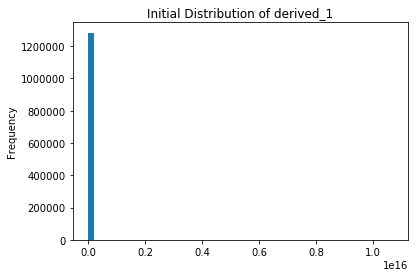

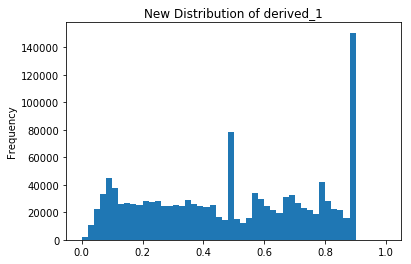

In [9]:
# Plot before and after distributions
clm='derived_1'
X_train[clm].plot.hist(bins=50,title= ("Initial Distribution of {}".format(clm)));
plt.figure()
X_train_transformed[clm].plot.hist(bins=50,title= ("New Distribution of {}".format(clm)));

In [8]:
# Save data after removing outliers
data_reduced={'X_train':X_train_reduced,'X_test':X_test, 'Y_train':Y_train_reduced, 'Y_test': Y_test}
output1 = open('data_reduced.pkl', 'wb')
pickle.dump(data_reduced, output1)
output1.close()

In [10]:
# Save data after transformation
data_transformed={'X_train':X_train_transformed,'X_test':X_test_transformed, 'Y_train':Y_train, 'Y_test': Y_test}
output2 = open('data_transformed.pkl', 'wb')
pickle.dump(data_transformed, output2)
output2.close()